# Basics of Neural Networks with scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

## Supporting function

In [3]:
def plot_decision_boundary(clf, X, y, ax=None, title=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    if title:
        ax.set_title(title)

## Generate Dummy Dataset

In [4]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Visualize the Dataset

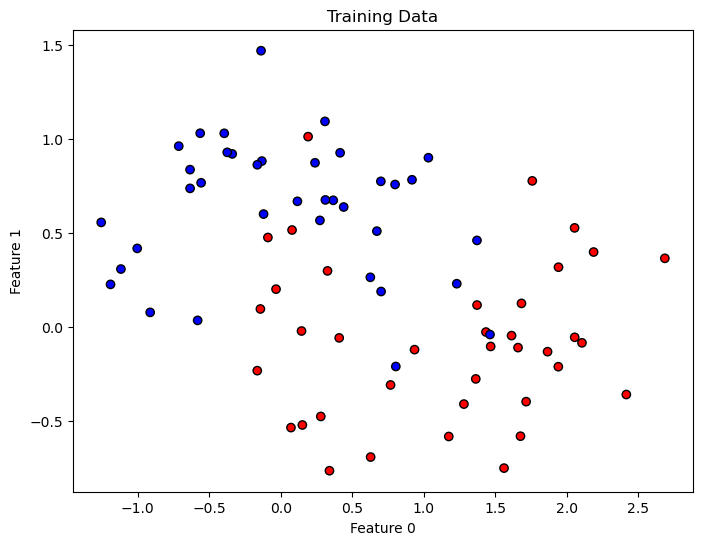

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Training Data')
plt.show()

## The Role of Activation Functions in Neural Networks

### 1. Deep Neural Network WITHOUT Activation Functions

Train accuracy (no activation): 0.84
Test accuracy (no activation): 0.88


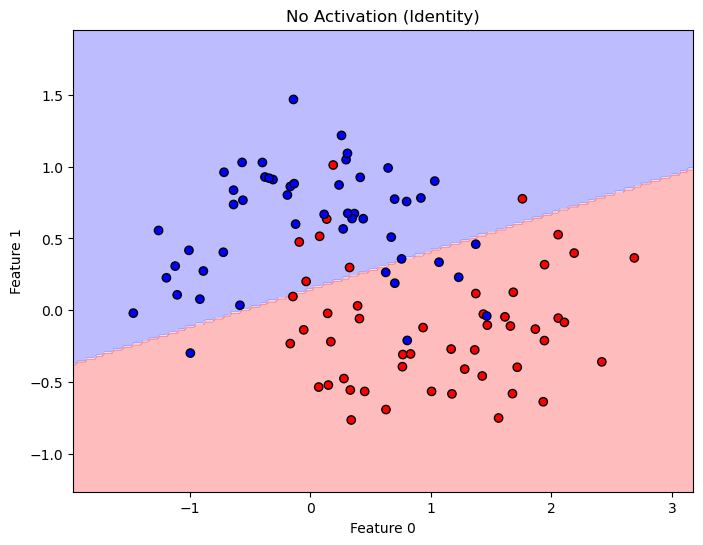

In [6]:
# Deep network with many layers/neurons, no activation (identity)
clf_no_activation = MLPClassifier(
    hidden_layer_sizes=(64, 64, 64, 64),
    activation='identity',
    max_iter=2000,
    random_state=42
)
clf_no_activation.fit(X_train, y_train)
print('Train accuracy (no activation):', clf_no_activation.score(X_train, y_train))
print('Test accuracy (no activation):', clf_no_activation.score(X_test, y_test))

plt.figure(figsize=(8,6))
plot_decision_boundary(clf_no_activation, X, y, plt.gca(), title='No Activation (Identity)')
plt.show()

### 2. Deep Neural Network WITH Activation Functions

Train accuracy (with activation): 0.9866666666666667
Test accuracy (with activation): 0.92


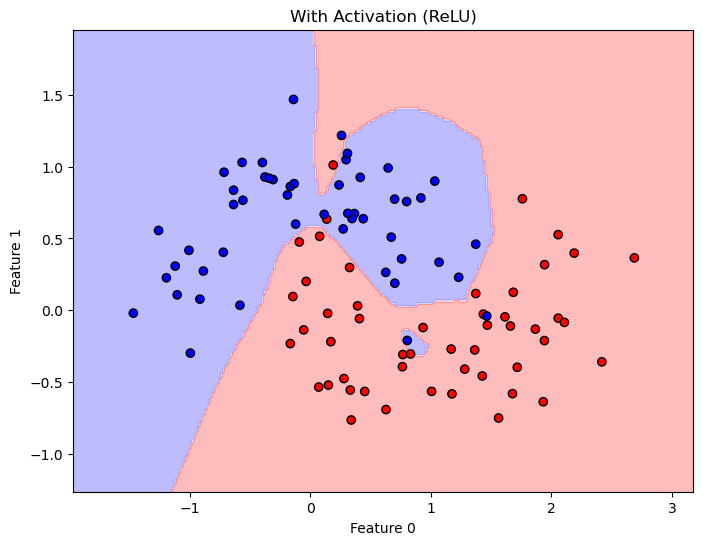

In [7]:
# Deep network with many layers/neurons, with activation (ReLU)
clf_with_activation = MLPClassifier(
    hidden_layer_sizes=(64, 64, 64, 64),
    activation='relu',
    max_iter=2000,
    random_state=42
)
clf_with_activation.fit(X_train, y_train)
print('Train accuracy (with activation):', clf_with_activation.score(X_train, y_train))
print('Test accuracy (with activation):', clf_with_activation.score(X_test, y_test))

plt.figure(figsize=(8,6))
plot_decision_boundary(clf_with_activation, X, y, plt.gca(), title='With Activation (ReLU)')
plt.show()


- Without activation functions, even deep networks behave like a linear model and cannot capture complex patterns.
- With activation functions, the network can learn non-linear decision boundaries and fit the data much better.